In [20]:
###problem1
import numpy as np
import pandas as pd
from scipy import stats

# Load the data
file_path = '/Users/queenieliu/test/FinTech545_Spring2024/Week02/Project/problem1.csv'
df = pd.read_csv(file_path)
sample = df['x'].dropna()

# Manual calculations
mean_manual = np.mean(sample)
var_manual = np.var(sample, ddof=1)
std_manual = np.sqrt(var_manual)
skew_manual = np.mean((sample - mean_manual)**3) / std_manual**3
kurt_manual = np.mean((sample - mean_manual)**4) / std_manual**4 - 3

# Using scipy.stats to calculate the first four moments
mean_package = stats.tmean(sample)
var_package = stats.tvar(sample)
skew_package = stats.skew(sample)
kurt_package = stats.kurtosis(sample)

# Print the results from manual calculations and scipy.stats functions
print("Manual Mean:", mean_manual)
print("Manual Variance:", var_manual)
print("Manual Skewness:", skew_manual)
print("Manual Kurtosis:", kurt_manual)

print("Package Mean:", mean_package)
print("Package Variance:", var_package)
print("Package Skewness:", skew_package)
print("Package Kurtosis:", kurt_package)

# Bootstrap calculations
n_bootstrap = 100
bootstrap_means = []
bootstrap_vars = []
bootstrap_skews = []
bootstrap_kurts = []

for _ in range(n_bootstrap):
    bootstrap_sample = sample.sample(len(sample), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))
    bootstrap_vars.append(np.var(bootstrap_sample, ddof=1))
    bootstrap_skews.append(stats.skew(bootstrap_sample))
    bootstrap_kurts.append(stats.kurtosis(bootstrap_sample))

# Perform one-sample t-tests to compare Scipy calculated moments with bootstrap distributions
# We are testing if the means of the bootstrap distributions (of the moments) are significantly different from the Scipy calculated moments
t_test_mean = stats.ttest_1samp(bootstrap_means, mean_package)
t_test_var = stats.ttest_1samp(bootstrap_vars, var_package)
t_test_skew = stats.ttest_1samp(bootstrap_skews, skew_package)
t_test_kurt = stats.ttest_1samp(bootstrap_kurts, kurt_package)

# Output the p-values from the t-tests
print(f'Mean: Scipy unbiased p-value = {t_test_mean.pvalue}')
print(f'Variance: Scipy unbiased p-value = {t_test_var.pvalue}')
print(f'Skewness: Scipy unbiased p-value = {t_test_skew.pvalue}')
print(f'Kurtosis: Scipy unbiased p-value = {t_test_kurt.pvalue}')

Manual Mean: 1.0489703904839585
Manual Variance: 5.427220681881727
Manual Skewness: 0.8792880598472443
Manual Kurtosis: 23.069982510610544
Package Mean: 1.0489703904839585
Package Variance: 5.427220681881727
Package Skewness: 0.8806086425277364
Package Kurtosis: 23.122200789989723
Mean: Scipy unbiased p-value = 0.08665421785218216
Variance: Scipy unbiased p-value = 0.12124762535154246
Skewness: Scipy unbiased p-value = 4.071630521010314e-05
Kurtosis: Scipy unbiased p-value = 3.213191221999744e-07


In [16]:
###Problem2-part1
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.stats import t as t_dist, norm

# Define the likelihood function for MLE with T-distribution
def negative_log_likelihood_t(params, X, y):
    intercept, beta, sigma, df = params
    y_pred = intercept + beta * X.squeeze()
    log_likelihood = t_dist.logpdf(y, df, loc=y_pred, scale=sigma)
    return -np.sum(log_likelihood)

# Define the likelihood function for MLE with normal distribution
def negative_log_likelihood_normal(params, X, y):
    intercept, beta, sigma = params
    y_pred = intercept + beta * X.squeeze()
    log_likelihood = norm.logpdf(y, loc=y_pred, scale=sigma)
    return -np.sum(log_likelihood)

# Function to calculate AIC
def calculate_aic(n, log_likelihood, num_params):
    return 2 * num_params - 2 * log_likelihood

# Load the data
data = pd.read_csv('/Users/queenieliu/test/FinTech545_Spring2024/Week02/Project/problem2.csv')
X = data['x'].values.reshape(-1, 1)
y = data['y'].values

# Perform MLE for T-distribution
initial_params_t = [0, 1, 1, 10]  # initial guesses for intercept, beta, sigma, df
mle_results_t = minimize(
    fun=negative_log_likelihood_t,
    x0=initial_params_t,
    args=(X, y),
    bounds=[(None, None), (None, None), (0.0001, None), (2 + 0.0001, None)]
)
intercept_mle_t, beta_mle_t, sigma_mle_t, df_mle_t = mle_results_t.x
log_likelihood_t = -mle_results_t.fun

# Perform MLE for normal distribution
initial_params_normal = [0, 1, 1]  # initial guesses for intercept, beta, sigma
mle_results_normal = minimize(
    fun=negative_log_likelihood_normal,
    x0=initial_params_normal,
    args=(X, y),
    bounds=[(None, None), (None, None), (0.0001, None)]
)
intercept_mle_normal, beta_mle_normal, sigma_mle_normal = mle_results_normal.x
log_likelihood_normal = -mle_results_normal.fun

# Calculate AIC for both models
aic_normal = calculate_aic(len(y), log_likelihood_normal, 3)  # 3 parameters for normal distribution
aic_t = calculate_aic(len(y), log_likelihood_t, 4)  # 4 parameters for T-distribution

# Output results
print("Normal Distribution MLE Results:")
print(f"Intercept: {intercept_mle_normal}, Beta: {beta_mle_normal}, Sigma: {sigma_mle_normal}")
print(f"AIC for normal distribution: {aic_normal}")

print("\nT-Distribution MLE Results:")
print(f"Intercept: {intercept_mle_t}, Beta: {beta_mle_t}, Sigma: {sigma_mle_t}, Degrees of Freedom: {df_mle_t}")
print(f"AIC for T-distribution: {aic_t}")

Normal Distribution MLE Results:
Intercept: -0.08738446727327266, Beta: 0.7752740525722255, Sigma: 1.0037562901114192
AIC for normal distribution: 575.0751261088562

T-Distribution MLE Results:
Intercept: -0.09726936782932959, Beta: 0.6750105041175957, Sigma: 0.8551061674397878, Degrees of Freedom: 7.159935245540183
AIC for T-distribution: 570.5868063613983


[0.0010227  0.99024382]
[[1.06977464 0.53068455]
 [0.53068455 0.96147329]]
X1 observed: -0.799934199, Conditional X2 mean: 0.5929120487352633, 95% CI: (-1.044850496925984, 2.2306745943965103)


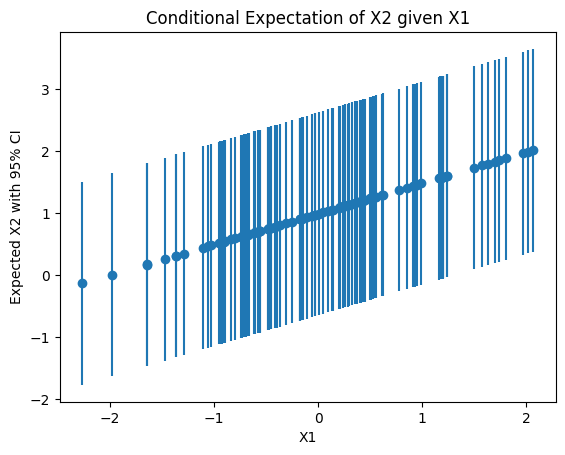

In [21]:
###Problem2-part2
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
# As I run the codes on Jupyter notebook, I use the above two lines of codes.

data_x = pd.read_csv('/Users/queenieliu/test/FinTech545_Spring2024/Week02/Project/problem2_x.csv')
data_x1 = pd.read_csv('/Users/queenieliu/test/FinTech545_Spring2024/Week02/Project/problem2_x1.csv')
x1_observed = data_x1.values.squeeze()
# Perform MLE to find the sample mean and covariance
mean_mle = data_x.mean().values
cov_mle = data_x.cov().values
# Output the MLE estimates for the mean and covariance
print(mean_mle)
print(cov_mle)

# Calculate the parameters of the conditional distributions
# For a multivariate normal [X1, X2], the conditional mean and variance are given by:
# E[X2 | X1] = mu2 + Sigma21 * inv(Sigma11) * (X1 - mu1)
# Var[X2 | X1] = Sigma22 - Sigma21 * inv(Sigma11) * Sigma12
mu1, mu2 = mean_mle[0], mean_mle[1]
sigma11, sigma12 = cov_mle[0, 0], cov_mle[0, 1]
sigma21, sigma22 = cov_mle[1, 0], cov_mle[1, 1]
sigma11_inv = 1.0 / sigma11

# Compute conditional means and variances
conditional_means = mu2 + sigma21 * sigma11_inv * (x1_observed - mu1)
conditional_variances = sigma22 - sigma21 * sigma11_inv * sigma12

# Compute the 95% confidence intervals for the conditional means
z_score = 1.96  # z-score for 95% confidence
conf_ints = [
    (mean - z_score * np.sqrt(var), mean + z_score * np.sqrt(var))
    for mean, var in zip(np.atleast_1d(conditional_means), np.atleast_1d(conditional_variances))
]

# Output the conditional means and confidence intervals
for i, (mean, conf_int) in enumerate(zip(np.atleast_1d(conditional_means), conf_ints)):
    print(f"X1 observed: {x1_observed[i]}, Conditional X2 mean: {mean}, 95% CI: {conf_int}")

# Plot the expected value of X2 with the 95% confidence intervals
plt.errorbar(x1_observed, conditional_means, yerr=1.96*np.sqrt(conditional_variances), fmt='o')
plt.xlabel('X1')
plt.ylabel('Expected X2 with 95% CI')
plt.title('Conditional Expectation of X2 given X1')
plt.show()

In [18]:
###Problem3
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('/Users/queenieliu/test/FinTech545_Spring2024/Week02/Project/problem3.csv')
ts = data['x']

for i in range(1, 4):
    ar_model = ARIMA(ts, order=(i, 0, 0)).fit()
    print(f'AR({i}) model AIC: {ar_model.aic}, BIC: {ar_model.bic}')

for i in range(1, 4):
    ma_model = ARIMA(ts, order=(0, 0, i)).fit()
    print(f'MA({i}) model AIC: {ma_model.aic}, BIC: {ma_model.bic}')

AR(1) model AIC: 1644.6555047688475, BIC: 1657.299329064114
AR(2) model AIC: 1581.079265904978, BIC: 1597.9376982986669
AR(3) model AIC: 1436.6598066945867, BIC: 1457.7328471866977
MA(1) model AIC: 1567.4036263707874, BIC: 1580.047450666054
MA(2) model AIC: 1537.9412063807388, BIC: 1554.7996387744276
MA(3) model AIC: 1536.8677087350309, BIC: 1557.9407492271419
